Things to do in Summer 2024

https://mml-book.github.io/

Implementing discrete Fourier transforms in terms of matrix multiplications 

Use OpenDevin as reference to build AutoAgent for neuroscience


Lookup reinforcement learning based neural architecture search


Recreate unsupervised learning on retinal waves paper


Train a neural network to do path integration, and try it out in the jungle

Knowledge drilling for math, build Bayesian models


Deep reinforcement learning zero to hero


Do an experiment on how good people can explain somethjbg


Build tridimensional hopfield network

Create graph via pointers

# Create graph via pointers

In [1]:
SCHEMA = {
    "Tcr": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Tra": {"HAS_TRA": {}},
            "Trb": {"HAS_TRB": {}},
            "Clone": {"ENCODES": {}},
            "Annotation": {"HAS_TCR": {}},
            "Species": {"PRODUCES": {}},
        },
    },
    "Tra": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "VAlpha": {"HAS_V": {}},
            "JAlpha": {"HAS_J": {}},
            "Cdr3Alpha": {"HAS_CDR3": {}},
            "Tcr": {"HAS_TRA": {}},
        },
    },
    "VAlpha": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Tra": {"HAS_V": {}},
        },
    },
    "JAlpha": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Tra": {"HAS_J": {}},
        },
    },
    "Cdr3Alpha": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Tra": {"HAS_CDR3": {}},
        },
    },
    "Trb": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "VBeta": {"HAS_V": {}},
            "JBeta": {"HAS_J": {}},
            "Cdr3Beta": {"HAS_CDR3": {}},
            "Tcr": {"HAS_TRB": {}},
        },
    },
    "VBeta": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Trb": {"HAS_V": {}},
        },
    },
    "JBeta": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Trb": {"HAS_J": {}},
        },
    },
    "Cdr3Beta": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Trb": {"HAS_CDR3": {}},
        },
    },
    "Clone": {
        "properties": {
            "id": str,
            "cdr3a_nt": str,
            "cdr3b_nt": str,
        },
        "relationships": {
            "Tcr": {"ENCODES": {}},
            "Repertoire": {
                "SAMPLED_FROM": {
                    "disease_state": str,
                    "timepoint": str,
                    "frequency": float,
                    "duplicate_count": int,
                }
            },
        },
    },
    "Repertoire": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Repertoire": {"IS_IN": {}},
            "Individual": {"IS_IN": {}},
            "Clone": {
                "SAMPLED_FROM": {
                    "disease_state": str,
                    "timepoint": str,
                    "frequency": float,
                    "duplicate_count": int,
                }
            },
            "Species": {"IS_OF_SPECIES": {}},
            "MhcB": {
                "EXPRESSES": {
                    "allele": str,
                }
            },
            "MhcA": {
                "EXPRESSES": {
                    "allele": str,
                }
            },
            "Study": {"IN_STUDY": {}},
        },
    },
    "Individual": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Repertoire": {"IS_IN": {}},
            "Clone": {
                "SAMPLED_FROM": {
                    "disease_state": str,
                    "timepoint": str,
                    "frequency": float,
                    "duplicate_count": int,
                }
            },
            "Species": {"IS_OF_SPECIES": {}},
            "MhcB": {
                "EXPRESSES": {
                    "allele": str,
                }
            },
            "MhcA": {
                "EXPRESSES": {
                    "allele": str,
                }
            },
            "Study": {"IN_STUDY": {}},
        },
    },
    "Study": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Repertoire": {"IN_STUDY": {}},
            "Individual": {"IN_STUDY": {}},
            "Database": {"IS_IN": {}},
            "Annotation": {
                "CLAIMS": {
                    "vdjdb_score": list[int],
                }
            },
        },
    },
    "Database": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Study": {"IS_IN": {}},
        },
    },
    "Annotation": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Tcr": {"HAS_TCR": {}},
            "Study": {
                "CLAIMS": {
                    "vdjdb_score": list[int],
                }
            },
            "PMhc": {"HAS_TARGET": {}},
        },
    },
    "PMhc": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Annotation": {"HAS_TARGET": {}},
            "Epitope": {"HAS_EPITOPE": {}},
            "Mhc": {"HAS_MHC": {}},
        },
    },
    "Mhc": {
        "properties": {
            "id": str,
            "class": int,
        },
        "relationships": {
            "PMhc": {"HAS_MHC": {}},
            "MhcA": {"HAS_MHCA": {}},
            "MhcB": {"HAS_MHCB": {}},
        },
    },
    "MhcA": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Mhc": {"HAS_MHCA": {}},
            "Repertoire": {"EXPRESSES": {}},
            "Individual": {"EXPRESSES": {}},
        },
    },
    "MhcB": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Mhc": {"HAS_MHCB": {}},
            "Repertoire": {"EXPRESSES": {}},
            "Individual": {"EXPRESSES": {}},
        },
    },
    "Epitope": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "PMhc": {"HAS_EPITOPE": {}},
            "Species": {"PRODUCES": {"gene": str}},
        },
    },
    "Species": {
        "properties": {
            "id": str,
        },
        "relationships": {
            "Repertoire": {"IS_OF_SPECIES": {}},
            "Individual": {"IS_OF_SPECIES": {}},
            "Epitope": {"PRODUCES": {}},
            "Tcr": {"PRODUCES": {}},
        },
    },
}

In [2]:
from typing import TypeVar, List, Generic, Type

T = TypeVar('T')

In [3]:
class Relationships:
    def __setitem__(self, key, value: T):
        setattr(self, key, value)

    def __getitem__(self, key: str) -> T:
        return getattr(self, key)

    def __repr__(self) -> str:
        return str(list(self.__dict__.values()))

class Node:
    def __init__(self) -> None:
        self.rels: Relationships[Node] = Relationships()
        self.node_type = self.__class__.__name__


def class_factory(baseclass, name):
    class NewClass(baseclass): pass
    NewClass.__name__ = name
    NewClass.__qualname__ = name
    return NewClass



In [4]:
entry_points = [class_factory(Node, i)() for i in SCHEMA]
    

In [5]:
def find_by_classname(cls_list: List[T], name):
    for cls in cls_list:
        if cls.__class__.__name__ == name:
            return cls

for key, value in SCHEMA.items():
    curr_cls = find_by_classname(entry_points, key)
    if curr_cls is None:
        continue
    rels_to_add = value['relationships']
    for rel in rels_to_add:
        rel_cls = find_by_classname(entry_points, rel)
        curr_cls.rels[rel] = rel_cls # type: ignore


In [6]:
test = entry_points[0]

In [7]:
entry_points[0].rels.Annotation.rels.PMhc.rels.Mhc.rels.MhcA.rels.Repertoire.rels.Clone.rels

[<__main__.Tcr object at 0x108ade810>, <__main__.Repertoire object at 0x108adee90>]

In [8]:
tcr.relationships[0].relationships

NameError: name 'tcr' is not defined

# Discrete fourier transform

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from notmonad import chain

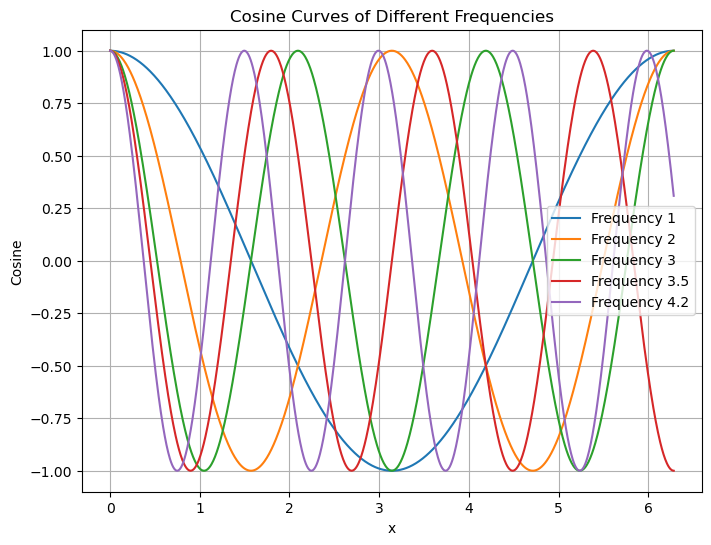

In [207]:

# Define the frequencies of the cosine curves
frequencies = [1, 2, 3,3.5,4.2]  # Change the frequencies as desired

# Generate the x-axis values
x = np.linspace(0, 2*np.pi, 1000)

# Generate the cosine curves
cosine_curves = np.array([np.cos(freq*x) for freq in frequencies])

# Plot the cosine curves
plt.figure(figsize=(8, 6))
for i, curve in enumerate(cosine_curves):
    plt.plot(x, curve, label=f"Frequency {frequencies[i]}")

plt.xlabel('x')
plt.ylabel('Cosine')
plt.title('Cosine Curves of Different Frequencies')
plt.legend()
plt.grid(True)
plt.show()


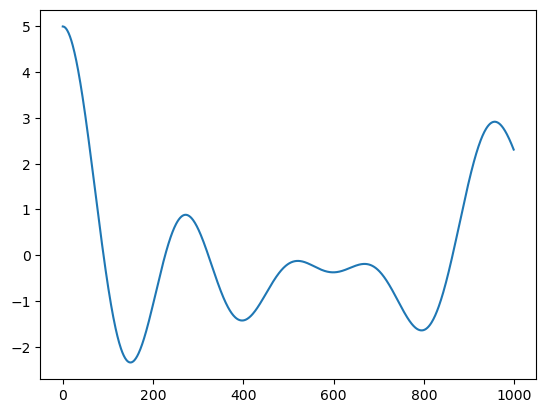

In [208]:
signal = cosine_curves.sum(axis=0)

plt.plot(signal)

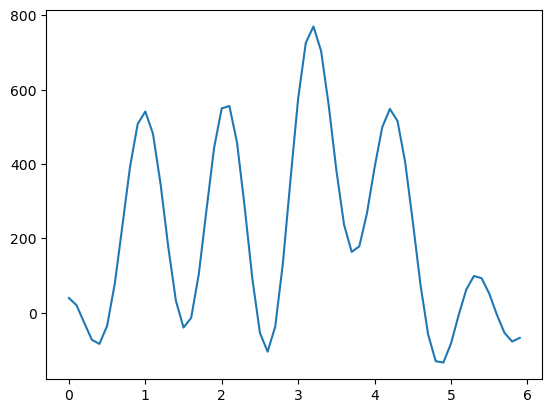

In [209]:
component_frequencies = np.arange(0,6,0.1)

similarities = [np.dot(np.cos(i*x), signal) for i in component_frequencies]

plt.plot(component_frequencies,similarities)

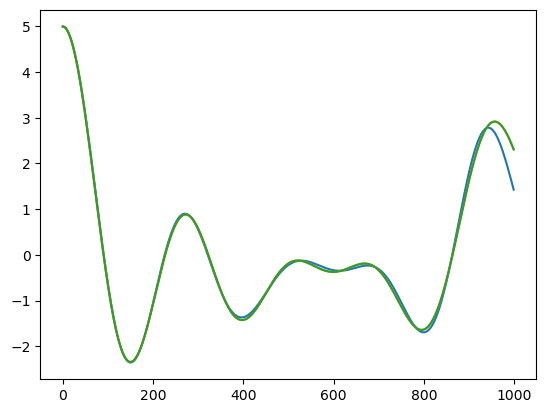

In [212]:
norm_simillarities = similarities / np.sum(similarities) * len(frequencies) 
# each freq max amplitude is 1, so if you have 5 freq, then max amp is now 5. 
# when u normalise, max amp is 1, so you multiply by 5 to match the signal

reconstructed_signal = []

for i, freq in enumerate(component_frequencies):
    weighted_signal = norm_simillarities[i] * np.cos(freq*x)
    reconstructed_signal.append(weighted_signal)

reconstructed_signal = np.array(reconstructed_signal).sum(axis=0)

plt.plot(reconstructed_signal)
plt.plot(signal)
plt.plot(chain(signal)(np.fft.fft)(np.fft.ifft)(np.real)())

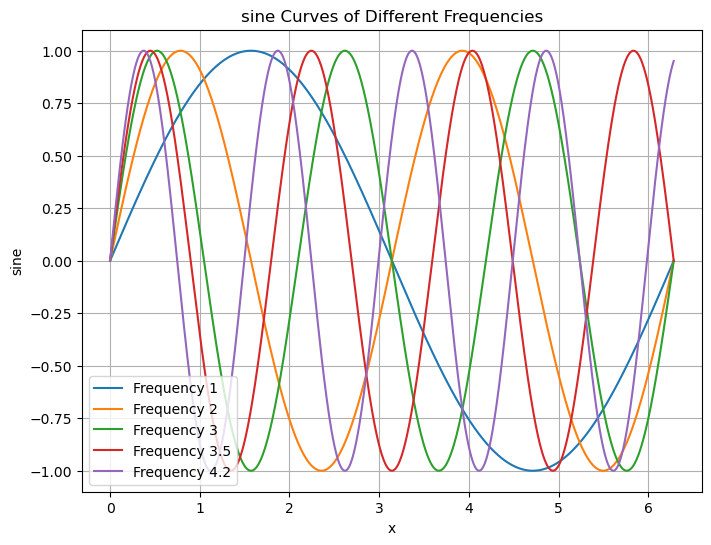

In [176]:

# Define the frequencies of the sine curves
frequencies = [1, 2, 3,3.5,4.2]  # Change the frequencies as desired

# Generate the x-axis values
x = np.linspace(0, 2*np.pi, 1000)

# Generate the sine curves
sine_curves = np.array([np.sin(freq*x) for freq in frequencies])

# Plot the sine curves
plt.figure(figsize=(8, 6))
for i, curve in enumerate(sine_curves):
    plt.plot(x, curve, label=f"Frequency {frequencies[i]}")

plt.xlabel('x')
plt.ylabel('sine')
plt.title('sine Curves of Different Frequencies')
plt.legend()
plt.grid(True)
plt.show()


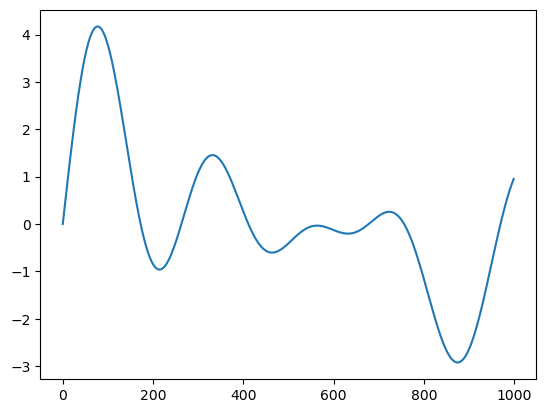

In [177]:
signal = sine_curves.sum(axis=0)

plt.plot(signal)

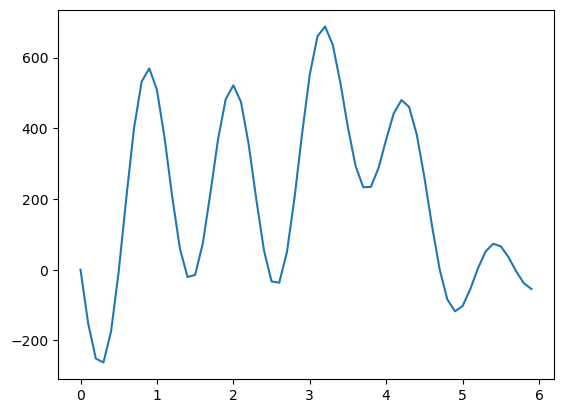

In [178]:
component_frequencies = np.arange(0,6,0.1)

similarities = [np.dot(np.sin(i*x), signal) for i in component_frequencies]

plt.plot(component_frequencies,similarities)

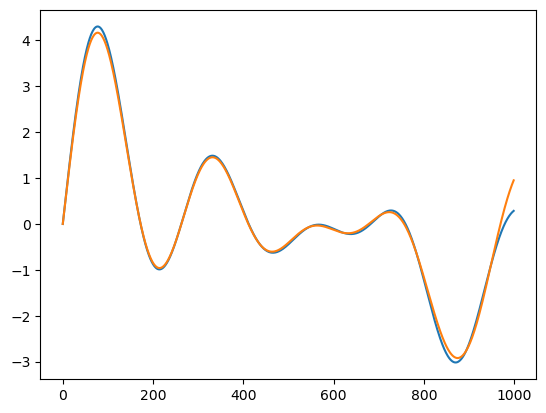

In [179]:
norm_simillarities = similarities / np.sum(similarities) * len(frequencies) 
# each freq max amplitude is 1, so if you have 5 freq, then max amp is now 5. 
# when u normalise, max amp is 1, so you multiply by 5 to match the signal

reconstructed_signal = []

for i, freq in enumerate(component_frequencies):
    weighted_signal = norm_simillarities[i] * np.sin(freq*x)
    reconstructed_signal.append(weighted_signal)

reconstructed_signal = np.array(reconstructed_signal).sum(axis=0)

plt.plot(reconstructed_signal)
plt.plot(signal)

In [183]:

# Define the frequencies of the sine curves
cos_frequencies = [1, 3, 5]  # Change the frequencies as desired
sin_frequencies = [2,4]

# Generate the x-axis values
x = np.linspace(0, 2*np.pi, 1000)

# Generate the sine curves
sin_curves = np.array([np.sin(freq*x) for freq in sin_frequencies])
cos_curves = np.array([np.cos(freq*x) for freq in cos_frequencies])



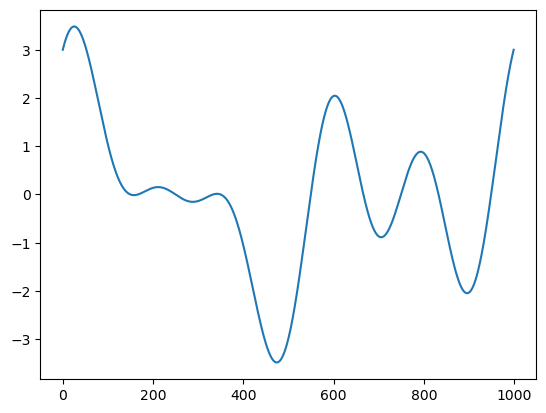

In [184]:
signal = sin_curves.sum(axis=0) + cos_curves.sum(axis=0)

plt.plot(signal)

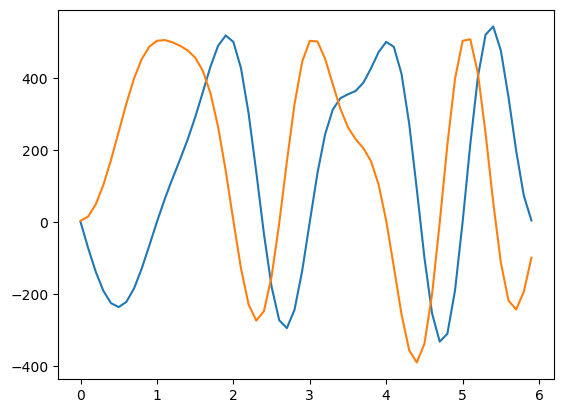

In [185]:
component_frequencies = np.arange(0,6,0.1)

sin_similarities = [np.dot(np.sin(i*x), signal) for i in component_frequencies]
cos_similarities = [np.dot(np.cos(i*x), signal) for i in component_frequencies]

plt.plot(component_frequencies,sin_similarities)
plt.plot(component_frequencies,cos_similarities)

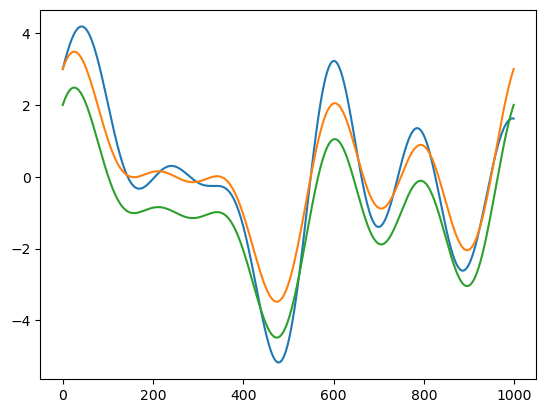

In [205]:
norm_sin_simillarities = sin_similarities / np.sum(sin_similarities) * len(sin_frequencies)
norm_cos_simillarities = cos_similarities / np.sum(cos_similarities) * len(cos_frequencies) 
# each freq max amplitude is 1, so if you have 5 freq, then max amp is now 5. 
# when u normalise, max amp is 1, so you multiply by 5 to match the signal

reconstructed_signal = []

for i, freq in enumerate(component_frequencies):
    sin_weighted_signal = norm_sin_simillarities[i] * np.sin(freq*x)
    cos_weighted_signal = norm_cos_simillarities[i] * np.cos(freq*x)
    reconstructed_signal.append(sin_weighted_signal)
    reconstructed_signal.append(cos_weighted_signal)

reconstructed_signal = np.array(reconstructed_signal).sum(axis=0)

plt.plot(reconstructed_signal)
plt.plot(signal)
plt.plot(chain(signal)(np.fft.fft)(np.fft.ifft)(np.real)(lambda x: x - 1)())

In [198]:
signal

array([ 3.00000000e+00,  3.03704165e+00,  3.07268153e+00,  3.10690338e+00,
        3.13969211e+00,  3.17103371e+00,  3.20091534e+00,  3.22932531e+00,
        3.25625307e+00,  3.28168923e+00,  3.30562553e+00,  3.32805491e+00,
        3.34897144e+00,  3.36837036e+00,  3.38624806e+00,  3.40260209e+00,
        3.41743115e+00,  3.43073508e+00,  3.44251488e+00,  3.45277265e+00,
        3.46151167e+00,  3.46873628e+00,  3.47445196e+00,  3.47866530e+00,
        3.48138396e+00,  3.48261668e+00,  3.48237325e+00,  3.48066454e+00,
        3.47750242e+00,  3.47289981e+00,  3.46687059e+00,  3.45942968e+00,
        3.45059291e+00,  3.44037710e+00,  3.42879996e+00,  3.41588015e+00,
        3.40163719e+00,  3.38609145e+00,  3.36926418e+00,  3.35117741e+00,
        3.33185400e+00,  3.31131754e+00,  3.28959241e+00,  3.26670367e+00,
        3.24267711e+00,  3.21753915e+00,  3.19131688e+00,  3.16403799e+00,
        3.13573075e+00,  3.10642401e+00,  3.07614711e+00,  3.04492993e+00,
        3.01280279e+00,  